In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [52]:
#Points coordinats for two NSU documents 

dog1 = [((1497, 231), (1505,254)),
((1567, 238), (1604, 252)),
((1586, 423), (2355, 452)),
((568, 598), (582, 612)),
((998, 598), (1012, 615)),
((1046, 601), (1061, 618)),
((1146, 604), (1158, 619)),
((1898,314), (1912, 332))]

dog2 = [((672, 1694),(692, 1708)),
((748, 1696), (772, 1709)),
((1725, 2281), (2394,2297)),
((1393, 2320), (1954, 2333)),
((1799, 2361), (2203, 2377)),
((1179, 2773), (1711, 2826))]


In [53]:
test1 = cv2.imread('dog1_full.jpg', cv2.IMREAD_GRAYSCALE)
test2 = cv2.imread('dog2_full.jpg', cv2.IMREAD_GRAYSCALE)
#cv2.namedWindow('exm', cv2.WINDOW_NORMAL)
#cv2.imshow ('exm',test1)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [54]:
def calc_image(img):
    """
    Функция возвращает процент чернил в картинке
    """
    thresholded = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    count_of_pixel = np.count_nonzero(thresholded)
    percent = 100 * np.count_nonzero(thresholded) / (img.size)

    return percent

def is_signature(img, threshold=5):
    """
    Проверяем есть ли подпись в ``img``
    :param threshold: порог, при котором мы считаем, что подпись есть
    :param img: вырезанное изображение подписи
    :return: true/false
    """
    percent = calc_image(img)
    return percent > threshold, round(percent, 3)

In [55]:
# x and y coordinates mixed up with each other
def is_valid(document, rects):
    for rect in rects:
        p1,p2 = rect
        x1,y1 = p1
        x2,y2 = p2
        valid = True
        field_img = document[y1:y2,x1:x2]
        #cv2.imshow('test', field_img)
        plt.imshow(field_img, cmap = 'gray', interpolation = 'bicubic')
        plt.xticks([]), plt.yticks([])
        plt.show()
        flag = is_signature(field_img)
        if flag[0] == False:
            valid = False
            #print ('Not full')
            break
    return valid

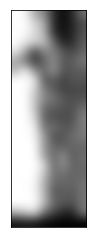

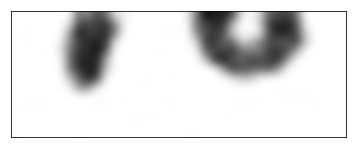

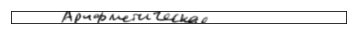

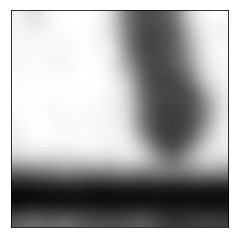

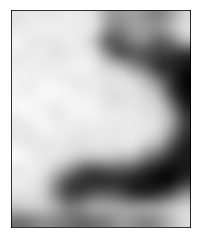

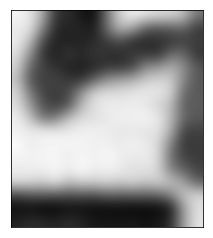

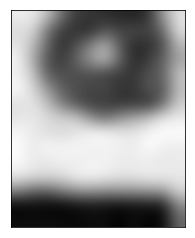

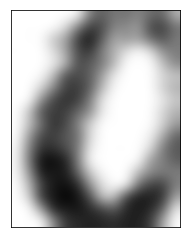

True


In [56]:
print (is_valid(test1,dog1))

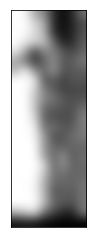

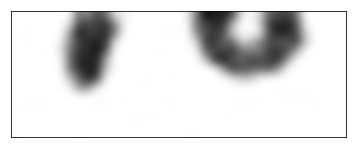

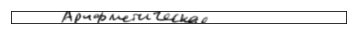

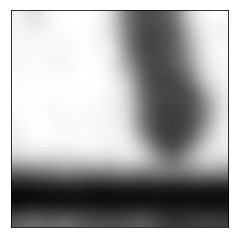

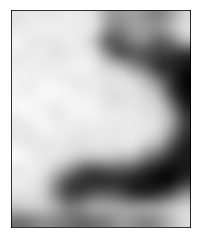

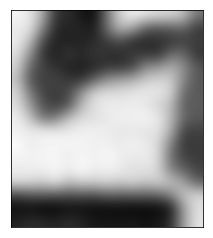

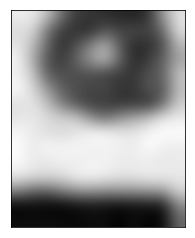

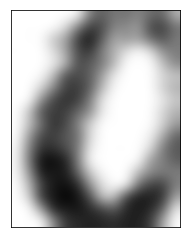

True


In [57]:
print (is_valid(test1,dog1))